# Importing required libraries.

In [1]:
#importing the required modules from libraries.
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup 
import time
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd

In [4]:
#defining color array for graphs.
color_arr=['#16A085','#FBEEE6','#ABB2B9','#E6B0AA','#D2B4DE','#AED6F1','#F9E79F','#FAD7A0','#EDBB99','#E5E7E9',
          '#C39BD3','#7FB3D5','#85929E','#2C3E50','#C0392B','#3498DB','#D35400','#F39C12','#9A7D0A','#641E16',
          '#5B2C6F','#154360','#0B5345','#186A3B','#229954','#F1C40F','#17202A','#E74C3C','#7B7D7D','#922B21']

In [3]:
#intialzing the driver session.
driver=webdriver.Chrome(executable_path='chromedriver.exe')
driver.maximize_window()

# Opening and login to Instagram.

In [5]:
#opening instagram.
driver.get('https://www.instagram.com/')
wait=WebDriverWait(driver,10)

USERNAME="*********"
PASSWORD="**********"
#explicit wait to load username and passing username.
username=wait.until(EC.presence_of_element_located((By.NAME,'username')))
username.send_keys(USERNAME)

#explicit wait to load password and passing password.
password_field=driver.find_element_by_name('password')
password_field.send_keys(PASSWORD)

#finding and clicking login button.
login_btn=driver.find_element_by_xpath('//button[contains(@class,"L3NKy")]')
login_btn.submit()

#Password save or Unsave.
pop_up1=wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="cmbtv"]/button')))
pop_up1.click()

# First a "Turn on Notification" window comes, so for now waiting till the window is loaded completely 
not_now = waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "HoLwm")))
# clicking on "Not Now"
not_now.click()

# Question---1.
# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

# 1.1 Extracting the top 5 handles with maximum number of followers.

Top 5 handles with highest number of follwers
---------------------------------------------
Username              |       Followers
---------------------------------------------
foodnetwork           |       10200000
buzzfeedfood          |        3700000
foodnetworkkitchen    |         616000
dilsefoodie           |         510000
foodtalkindia         |         297000
---------------------------------------------


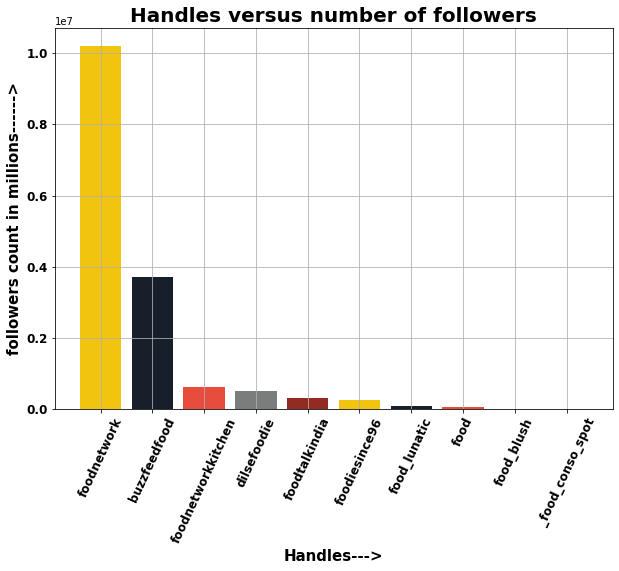

In [8]:
#creating dictionary to store the handles and number of followers for the same.
d={}

#Looping over the first 10 handles and extarcting their followers count.
for i in range(10):
    try:
        search_bar=driver.find_element_by_xpath('//input[contains(@class,"x3qfX")]')
        search_bar.clear()
        search_bar.send_keys('food')
        path='//div[@class="fuqBx"]/a'+str([i+1])
        handle= WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,path)))
        handle.click()
        time.sleep(5)
        handle_name=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//h2[starts-with(@class,"_7UhW9")]')))
        key=handle_name.text
        followers=driver.find_element_by_xpath('//ul[@class="k9GMp "]/li[2]/a/span[@class="g47SY "]').text
        d[key]=followers
        time.sleep(5)
    except:
        continue

#coverting the million and thousand representations in numbers.        
for i in d:
    if str(d[i])[-1]=='k':
        val=d[i][:-1]
        d[i]=float(val)*1000
    elif str(d[i])[-1]=='m':
        val=d[i][:-1]
        d[i]=float(val)*1000000
    else:
        d[i]=float(d[i])
    

#sorting the dictionary based upon followers count.
sorting_top10={k: v for k,v in sorted(d.items(),key=lambda i:i[1],reverse=True)}
count=0

#creating lists to store top5_handles and their followers.
top_5_handles=[]
top_5_followers=[]

print("Top 5 handles with highest number of follwers")
print("---------------------------------------------")
print("Username              |       Followers")
print("---------------------------------------------")

#printing the top5_handels with count of followers.
for i in sorting_top10:
    if count==5:
        break
    print('{:<22s}|{:>15d}'.format(i,int(sorting_top10[i])))
    top_5_handles.append(i)
    top_5_followers.append(sorting_top10[i])
    count+=1
print("---------------------------------------------")

#plotting graph for the first 10 handles.
plt.figure(figsize=(10, 7))
plt.bar(list(sorting_top10.keys()),list(sorting_top10.values()),color=color_arr[25:30])
plt.xticks(rotation=65,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Handles versus number of followers', fontsize=20,fontweight='bold')
plt.xlabel('Handles--->', fontsize=15,fontweight='bold')
plt.ylabel('followers count in millions------>', fontsize=15,fontweight='bold')
plt.grid()
plt.show()



# 1.2 Getting the count of posts made by the top 5 handles in past 3 days.

In [10]:
driver.find_element_by_class_name("cq2ai").click()

#creating list to store the count of posts for handles.
no_of_posts=[]

#iterating over the top5_handels.
for user in top_5_handles:
    
    #searching profile and opening it count the posts.
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    
    for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
        if i.get_attribute("innerHTML")==user:
            i.click()
            break
    
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(2)
    
    #counting  the posts.
    count,ps = 0,0
    while True:
        try:
            t1=time.time()
            for post in WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="_9AhH0"]'))):
            
                post.click()

                WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))

                time_string = driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')

                #if the post was hours, seconds, minutes adding its count.
                if time_string[-1] in ['h', 's', 'm']:
                    count+=1
                
                #if the posts was in days checking it's not older than 3 days.
                elif time_string[-1]=='d' and int(time_string[:-1])<=3:
                    count+=1
                else:
                    # locating the cross button to go to back page
                    back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
                    # clicking on cross button
                    back.click()
                    time.sleep(2)
                    break
                # locating the cross button to go to back page
                back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
                # clicking on cross button
                back.click()
                time.sleep(2)
                ps+=1


                if ps%6==0:
                    driver.execute_script('window.scrollBy(0,1000);')
                    time.sleep(3)
                    

                WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
                time.sleep(2)
            break
                
        except:
            continue

    driver.back()
        
    no_of_posts.append(count)

#printing the count of posts for the handles.
print("Number of posts by Top 5 handles in last 3 days")
print("---------------------------------------------")
print("Username              |       No. of Posts")
print("---------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>11d}'.format(top_5_handles[i],no_of_posts[i]))    
print("---------------------------------------------")

Number of posts by Top 5 handles in last 3 days
---------------------------------------------
Username              |       No. of Posts
---------------------------------------------
foodnetwork           |         24
buzzfeedfood          |          0
foodnetworkkitchen    |         19
dilsefoodie           |          3
foodtalkindia         |          6
---------------------------------------------


# 1.3 Depicting the information using Graphs.

<Figure size 432x288 with 0 Axes>

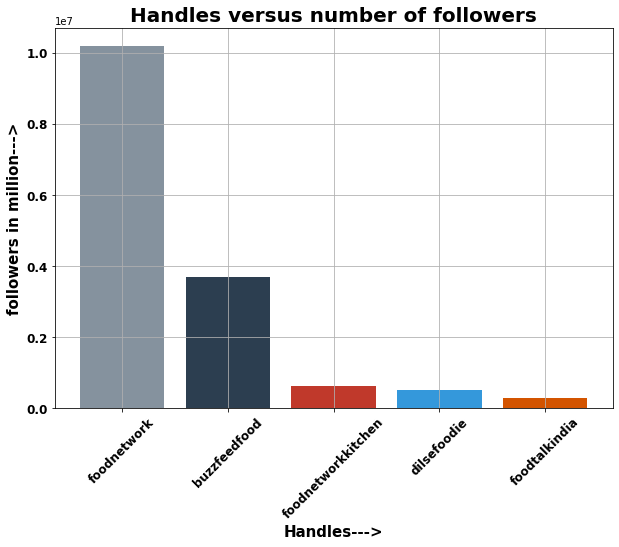

<Figure size 432x288 with 0 Axes>

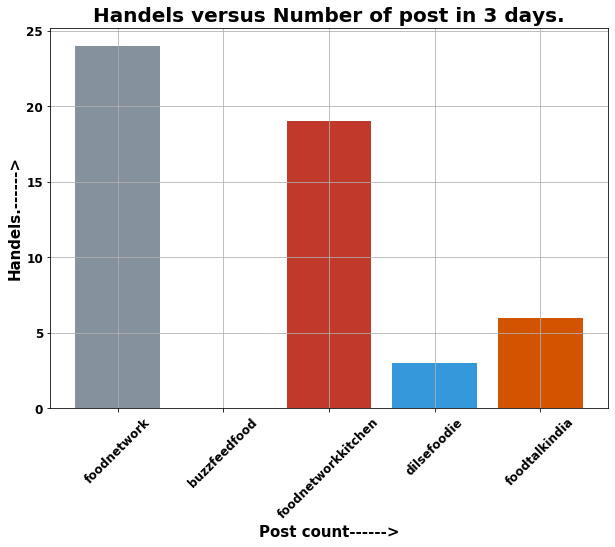

In [11]:
#plotting the graph between top5_handles and their respective followers.
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(top_5_handles, top_5_followers,color=color_arr[12:17])
plt.xticks(rotation=45,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Handles versus number of followers', fontsize=20,fontweight='bold')
plt.xlabel('Handles--->',fontsize=15,fontweight='bold')
plt.ylabel('followers in million--->', fontsize=15,fontweight='bold')
plt.grid()
plt.show()

#plotting the graph between top5_handles and their posts count.
plt.subplots(0,1)
plt.figure(figsize=(10,7))
plt.bar(top_5_handles,no_of_posts,color=color_arr[12:17])
plt.xticks(rotation=45,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Handels versus Number of post in 3 days.',fontsize=20,fontweight='bold')
plt.xlabel('Post count------>',fontsize=15,fontweight='bold')
plt.ylabel('Handels.------>',fontsize=15,fontweight='bold')
plt.grid()
plt.show()

# Question---2. 
# Your friend also needs a list of hashtags that he should use in his posts.

# 2.1 Scrapping the contents of top 10 posts made by the top_5_handles. 

In [12]:
#here I have visited all the contents of 10 posts made by top5_handles and store the content and hashtag in seprate lists.
driver.find_element_by_class_name("cq2ai").click()

#creating lists to store the content and hashtags.
content=[]
hashtags=[]

#visting each handle.
for user in top_5_handles:
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    #iterating over the posts.
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        if count>=10:
            back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
            # clicking on cross button
            back.click()
            break
            driver.back()
        back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
        back.click()
        time.sleep(2)
    driver.back()
    time.sleep(1)
for i in content:
    print(i)
    print("-------------------------------------------------------------------------------------------------------------")

Blueberry Pancake Cake (with @trishayearwood)@TrishaYearwood says this is basically a giant pancake in a skillet and we are 100% on board with that! Save her recipe on the @FoodNetworkKitchen app.
-------------------------------------------------------------------------------------------------------------
Why does everything just taste BETTER on a skewer? Paired with a gorgeous cucumber-cilantro rice, these spicy grilled shrimp make for an incredible summer dinner!⁠. . .⁠Click the link in our bio to take @clairethomas' class today on the @FoodNetworkKitchen app. Don't forget to take pics and tag #FoodNetworkKitchen!
-------------------------------------------------------------------------------------------------------------
ICYMI: @bobbyflay's juicy turkey burgers are a 10/10 when topped with Swiss cheese-stuffed portobello mushrooms 🤤⁠. . .⁠Click the link in our bio to take the entire #BobbysBurgers course (including this Portobello Mushroom and Swiss Turkey Burgers class) on the #Foo

# 2.2 Printing the frequency of each word in the content of posts.

In [13]:
#creating dictionary to store the frequency of each word.
dic_words={}

#converting to numpy array.
content=np.array(content)

#iterating over each comment.
for i in content:
    
    #splitting the words.
    words=re.findall(r"[\w']+", i)
    
    #itearting over each word and counting their frequency.
    for j in words:
        dic_words[j.strip()]=dic_words.get(j.strip(),0)+1
print(dic_words)
        

{'Blueberry': 1, 'Pancake': 1, 'Cake': 1, 'with': 31, 'trishayearwood': 1, 'TrishaYearwood': 1, 'says': 1, 'this': 11, 'is': 11, 'basically': 1, 'a': 39, 'giant': 1, 'pancake': 1, 'in': 28, 'skillet': 1, 'and': 47, 'we': 4, 'are': 8, '100': 1, 'on': 27, 'board': 1, 'that': 7, 'Save': 1, 'her': 4, 'recipe': 7, 'the': 76, 'FoodNetworkKitchen': 19, 'app': 19, 'Why': 3, 'does': 2, 'everything': 2, 'just': 3, 'taste': 4, 'BETTER': 2, 'skewer': 2, 'Paired': 2, 'gorgeous': 2, 'cucumber': 2, 'cilantro': 2, 'rice': 3, 'these': 2, 'spicy': 2, 'grilled': 2, 'shrimp': 2, 'make': 11, 'for': 31, 'an': 4, 'incredible': 2, 'summer': 4, 'dinner': 3, 'Click': 7, 'link': 8, 'our': 9, 'bio': 8, 'to': 45, 'take': 8, "clairethomas'": 2, 'class': 8, 'today': 3, "Don't": 2, 'forget': 2, 'pics': 2, 'tag': 2, 'ICYMI': 1, "bobbyflay's": 1, 'juicy': 2, 'turkey': 1, 'burgers': 1, '10': 3, 'when': 1, 'topped': 1, 'Swiss': 2, 'cheese': 3, 'stuffed': 1, 'portobello': 1, 'mushrooms': 1, 'entire': 1, 'BobbysBurgers': 1

# 2.3 Saving the count of respective word in word_frequency.csv file.

In [14]:
#saving the words frequency in .csv file.

#getting the words array.
word_in_post=np.array(list(dic_words.keys()))

#getting the frequency array.
Number_of_time_word_occured=np.array(list(dic_words.values()))

#creating dataframe.
df=pd.DataFrame()
df['word_in_post']=word_in_post
df['Number_of_time_word_occured']=Number_of_time_word_occured

#saving in .csv file.
df.to_csv('words_frequency.csv')

# 2.4 Finding out the hashtags that were most famous in 10 posts of top_5_handles.

In [15]:
#firstly i will convert the "hashtags" list to a numpy array.
hashtags=np.array(hashtags)

#creating dictionary to get frequency of each hashtag.
dic_hash={}

#iterating over hashtag array and getting their frequency.
for i in hashtags:
    if i[0]!='@' and i!='':
        dic_hash[i]=dic_hash.get(i,0)+1
#printing dictionary.
print("Hashtags with number of times they were used in posts.")
print("-------------------------------------------------------------")
print("Hashtag                         |       No. of times occured")
print("-------------------------------------------------------------")
for i in dic_hash:
    print('{:<32s}|{:>11d}'.format(i,dic_hash[i]))    
print("-------------------------------------------------------------")  


Hashtags with number of times they were used in posts.
-------------------------------------------------------------
Hashtag                         |       No. of times occured
-------------------------------------------------------------
#FoodNetworkKitchen             |         13
#BobbysBurgers                  |          1
#BeatBobbyFlay                  |          1
#RestaurantImpossible           |          1
#GroceryGames                   |          2
#TheKitchen                     |          1
#bringme                        |          1
#portlandtravel                 |          1
#sushirestuarant                |          1
#sushi                          |          1
#oregontravel                   |          1
#sustainability                 |          1
#cilantro                       |          1
#cilantroHATE                   |          1
#7                              |          1
#follow                         |          1
#kitchen                        |       

# Saving the hashtags in hashtags_frequency.csv file.

In [16]:
#Saving the words only will not be meaningful so saving the hashtags also in .csv file.

#getting the words array.
hashtag_names=np.array(list(dic_hash.keys()))

#getting the frequency array.
occurences=np.array(list(dic_hash.values()))

#creating dataframe.
df=pd.DataFrame()
df['Hashtags']=hashtag_names
df['Occurences']=occurences

#saving in .csv file.
df.to_csv('hashtags_frequency.csv')

# Hashtags popularity wise.

In [17]:
#sorting the hashtags dictionary obtained in  2.4 based upon frequency.
hashtags_popularity={k:v for k,v in sorted(dic_hash.items(),key=lambda item:item[1],reverse=True)}

#printing hashtags based upon their popularity i.e, how frequent they occur.
print("Popularity of various hashtgas used in post.")
print("------------------------------------------------------------------------------")
print("Hashtag                         |       Popularity(Number of times appeared)")
print("------------------------------------------------------------------------------")
for i in hashtags_popularity:
    print('{:<32s}|{:>11d}'.format(i,hashtags_popularity[i]))    
print("------------------------------------------------------------------------------")

Popularity of various hashtgas used in post.
------------------------------------------------------------------------------
Hashtag                         |       Popularity(Number of times appeared)
------------------------------------------------------------------------------
#FoodNetworkKitchen             |         13
#dilsefoodie                    |         10
#GroceryGames                   |          2
#BobbysBurgers                  |          1
#BeatBobbyFlay                  |          1
#RestaurantImpossible           |          1
#TheKitchen                     |          1
#bringme                        |          1
#portlandtravel                 |          1
#sushirestuarant                |          1
#sushi                          |          1
#oregontravel                   |          1
#sustainability                 |          1
#cilantro                       |          1
#cilantroHATE                   |          1
#7                              |          1


# Creating pie chart to depict the hashtags which were widely used and number of times they were used.

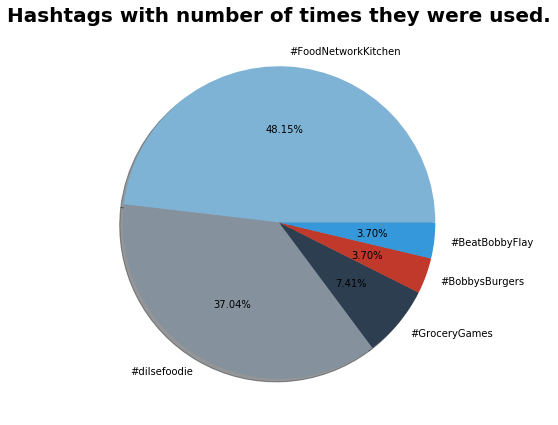

In [20]:
#selecting the first five popular hashtags.
x=list(hashtags_popularity.keys())[:5]

#getting the frequency of first five popular hashtags.
y=list(hashtags_popularity.values())[:5]

#creating pie chart.
plt.figure(figsize=(7,10))
plt.pie(y,labels=x,colors=color_arr[11:16],autopct='%.2f%%', shadow=True, labeldistance=1.1)
plt.title('Hashtags with number of times they were used.',fontsize=20,fontweight='bold')
plt.show()

# Question---3. calculating the average followers : likes ratio.

# 3.1 Finding out likes on top 10 posts of top_5_handles. 

In [21]:
#The motive is to visit each post of to5_handles and count their likes n posts.
driver.find_element_by_class_name("cq2ai").click()

#creating array to store the likes sum for each handle.
like=[]

#iterating over the first five handles.
for user in top_5_handles:
    print(user, end=" ------------- ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    while True:
        try:
            for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
                i.click()
                #clicks on the post of the user being iterated.
                try:
                    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[starts-with(@class, "sqdOP")]/span')))
                    likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "sqdOP")]/span').get_attribute('innerHTML').split(',')))
                except TimeoutException:
                    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
                    likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
                count+=1
                
                if count>=10:
                    back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
                    back.click()
                    time.sleep(2)
                    driver.back()
                    break
                back = driver.find_element_by_xpath("//div[@class='_2dDPU CkGkG']/div[3]/button")
                back.click()
                time.sleep(2)
                driver.back()
                time.sleep(1)
            print("total", likes, "likes on 10 latest posts")
            like.append(likes)
            break
        except:
            continue

foodnetwork ------------- total 1184776 likes on 10 latest posts
buzzfeedfood ------------- total 1501327 likes on 10 latest posts
foodnetworkkitchen ------------- total 123179 likes on 10 latest posts
dilsefoodie ------------- total 1095001 likes on 10 latest posts
foodtalkindia ------------- total 19987 likes on 10 latest posts


# 3.2 Calulating average likes for handle respectively.

In [23]:
#getting the top five handles.
top5=np.array(top_5_handles)

#converting likes in numpy array.
likes=np.array(like)

#converting the followers of top5_handles in numpy array.
followers_5=np.array(top_5_followers)

#getting the averages of likes in avg_likes numpy array.
avg_likes=likes/10

print("Average likes for handle.")
print("---------------------------------------------")
print("Handle Name           |       Average likes.")
print("---------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>18s}'.format(top5[i],str(avg_likes[i])))    
print("---------------------------------------------")

Average likes for handle.
---------------------------------------------
Handle Name           |       Average likes.
---------------------------------------------
foodnetwork           |          118477.6
buzzfeedfood          |          150132.7
foodnetworkkitchen    |           12317.9
dilsefoodie           |          109500.1
foodtalkindia         |            1998.7
---------------------------------------------


# 3.3 Calculating followers:like ratio.

In [24]:
#Getting the followers:like ratio by dividing the each element of followers array with elements of avg_likes.
ratio=followers_5/avg_likes
print("Followers:likes ratio for handle.")
print("--------------------------------------------")
print("Handle Name           |      Followers:like.")
print("--------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>20s}'.format(top5[i],str(ratio[i])))    
print("--------------------------------------------")

Followers:likes ratio for handle.
--------------------------------------------
Handle Name           |      Followers:like.
--------------------------------------------
foodnetwork           |   86.09222334010816
buzzfeedfood          |    24.6448641768249
foodnetworkkitchen    |     50.008524180258
dilsefoodie           |   4.657529993123294
foodtalkindia         |  148.59658778205832
--------------------------------------------


# 3.4 Creating Graph to depict the handles and followers:like ratio.

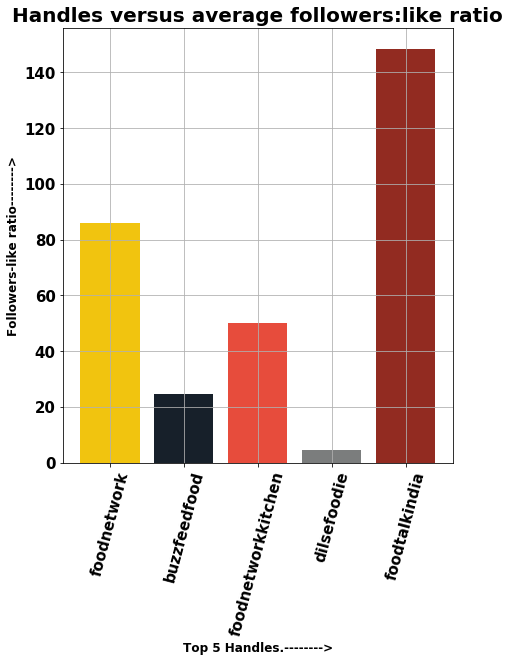

In [26]:
#plotting graph to get show handles with their respective followers:like ratio.
plt.figure(figsize=(7,8))
plt.bar(top_5_handles,ratio,color=color_arr[25:30])
plt.xticks(rotation=75,fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.title('Handles versus average followers:like ratio',fontsize=20,fontweight='bold')
plt.grid()
plt.xlabel('Top 5 Handles.-------->',fontsize=12,fontweight='bold')
plt.ylabel('Followers-like ratio-------->',fontsize=12,fontweight='bold')
plt.show()